# BUS 32100 

## Final Exam, Autumn 2022

Please choose one of the three datasets below, or any data set you did not use from the midterm, or any dataset that you have available to you (either that you find online or from any other work that you do) and run a full set of data analytics. This includes cleaning the data, EDA, engineering at least one feature, and running at least one model. 

**Programming language and output format:**
> * You may use Python, R or a combination
> * You may use multiple data tables in one analysis (one of the datasets has multiple data tables on kaggle)
> * You may use a Jupyter notebook, R script, or R markdown notebook (I showed what this was in week 6 but I didn't use it, but it's easy enough to pick up, if you're interested in going down that route)

**If anything is unclear:**
> * There will be office hours, but Han and Jian will be quite a bit less helpful than in prior weeks
> * You can Slack me any questions or clarifications
> * If the Booth servers seem not to be working, assume it's a wider issue and notify me right away so I can email IT immediately

**Grading rubric:**

You will be graded out of 100. We will assign points in this way: 

> Comments and explanation: 10 points
>> * Does your code have sufficient comments? No particular style is required, we're just looking for some helpful explanation of what you're doing
>> * Have you included text explanations of what you're doing at each step, and what you've learned from specific analyses? Include sufficient exposition about what you did and what you learned from it. More points will be given for weaving this throughout the whole analysis instead of a single summary at the end/beginning 

> Problem question and conclusion: 10 points
>> * Write out in words what your problem statement is, aka why should we care? Who's your audience? 
>> * Write out your conclusion in words
>> * These points are separate from above, where we're looking for exposition throughout 

> Data cleaning: 10 points
>> * Have you checked whether the data has errors? E.g. missing values that can be filled in, incorrect headers, outliers, etc. If the dataset you chose does not require cleaning, we'll be looking for evidence that you did quality checks (e.g. what's the range of each feature, do the max/min values make sense)

> EDA: 25 points
>> * After you've cleaned the data, have you created plots or tables to understand the data
>> * Go back to the diamonds example in R for some inspiration of useful EDA
>> * We'll be looking for high-quality plots/tables here: this means you don't have to create a large number of plots, but make sure the ones you do make are reasonable for the problem you're trying to solve 

> Feature engineering: 15 points
>> * Did you create at least one new column for your data
>> * To get full credit, use your new feature in your model
>> * Be careful to avoid data leakage! That is, don't use your output variable (y) in your new column! 

> Model: 25 points
>> * Did you create at least one model (linear regression or logistic regression) 
>> * Did you use the appropriate metrics to judge your model? E.g. RMSE, R^2, accuracy, precision, recall 
>> * For full credit, you'll probably have to create more than one model: change your inputs and see if it improves your model
>> * Note that you will **NOT** be docked points if your model has a poor fit (e.g. a low R^2). You won't get many points for just creating model after model if it seems done for quantity over quality, but we want to see some creativity
>> * If it makes sense, add a chart to explain if your model is working well (e.g. residual plot (example given in R with the mod3a and mod3b), confusion matrix) 

> Style: 5 points
>> * A spillover category to capture anything else you add to your analysis 
>> * We'll be looking at your project holistically here: does it flow, does it read easily, is it polished and can it be presented as a work product 
>> * Don't overthink this, but don't leave broken code or comments that don't refer to anything anymore in your final product 

Minimally sufficient outputs (remember, if you just check all the boxes in a minimal way, the max grade for that will be a B or B+ at most): 
* Data quality check (for example, are there nulls)
* One EDA chart or table
* One instance of feature engineering 
* One model (linear regression or logistic regression)
* One metric for the above model (e.g. R^2, or confusion matrix) 

-----------------------------------------------

### 1. Import data

### 1c) Flight delays

Sources:
1. https://www.kaggle.com/usdot/flight-delays?select=flights.csv
2. https://www.kaggle.com/kashnitsky/mlcourse?select=flight_delays_train.csv

Notes: 
* There are two possible options for a flight delays dataset, you need to choose only one
* File #1 (the one direct from the USDOT) is much larger, with many more columns; you won't be able to open this in Excel, so don't even try! 
* File #2 is only a classification dataset as it only includes whether there was a delay and not how long the delay was
* You will NOT be able to use the larger dataset on the Booth server, so you'll need to use a local Python/Jupyter install if you want to use that one

# 0. Problem Statement

***

As a frequent traveler, I've always questioned what causes delays on my flights. This analysis will be useful for airline flyers who are trying to decrease their amount of delays by knowing which airlines, airports, and types of flights typically have more frequent or longer delay times. 

For this project, I decided to use the larger flight dataset because there was a greater number of continuous variables (vs categorical variables) which should contribute to a better linear or logistic regression. I will use a linear regression and a logistic regression for my models and I will use AIRLINE_DELAY as my dependent variable for both. For my focus, I will explore the airline delay component of this dataset and whether the information in the dataset can accurately predict whether there's a delay. 

****

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# requires a local Jupyter/Python install as the file is too big (.5 GB) to use on the server
flights = pd.read_csv('/Users/douglasmacintosh/Downloads/archive(2)/flights.csv')

# 1. Data cleaning and exploration

In [3]:
flights.describe

<bound method NDFrame.describe of          YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPOR

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

***

As we can see there are a large amount of nulls in this dataset. For us to move forward, we will need to fix or remove those values. 

***

In [5]:
flights = flights.fillna(0)

****

After reviewing the dataset, I chose to fill the NaN cells with 0. These cells are all blank. By writing 0 into those values, it won't change the information gained from that row. For example, we see in row 320, a flight has been canceled. By inserting 0 into all of the empty cells, we aren't changing the information gathered in that row. Other options for handling NaNs would have been deleting the rows (which would have deleted valuable information) or replacing the NaNs cells with other values such as the median or mean data from that column (which wouldn't change the median or mean but would manipulate my data unnecessarily). 

***

In [6]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

****
Now I'll run through the categorical columns and see if there are any typos or inconsistencies that I need to correct. 
****

In [6]:
pd.options.display.max_rows = 999

In [10]:
flights['AIRLINE'].value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [11]:
flights['TAIL_NUMBER'].value_counts()

0         14721
N480HA     3768
N484HA     3723
N488HA     3723
N493HA     3585
          ...  
N7LBAA        1
N121UA        1
N180UA        1
N860NW        1
N852NW        1
Name: TAIL_NUMBER, Length: 4898, dtype: int64

***
It appears that there are 14721 aircraft with no tail numbers in this column. After doing a cursory review of the 4898 unique values, I decided to keep it named as 0 since they are all insolated in that value and there's no need to change it if we understand that. 
***

In [12]:
flights['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
SFO      148008
PHX      146815
IAH      146622
LAS      133181
MSP      112117
MCO      110982
SEA      110899
DTW      108500
BOS      107847
EWR      101772
CLT      100324
LGA       99605
SLC       97210
JFK       93811
BWI       86079
MDW       80886
DCA       73794
FLL       73624
SAN       70207
MIA       69341
PHL       66021
TPA       63906
DAL       59699
HOU       52042
BNA       47580
PDX       47085
STL       46963
HNL       43172
OAK       42316
AUS       42067
MSY       38804
MCI       38665
SJC       38200
SMF       37212
SNA       37187
CLE       34589
IAD       34305
RDU       31896
10397     30824
MKE       29825
SAT       29788
RSW       27350
13930     26117
IND       25558
SJU       24656
CMH       24187
PIT       24118
PBI       22573
OGG       20627
CVG       20031
11298     19840
ABQ       19192
BUR       18889
BDL       18799
JAX       18038
ONT       17978
11292     17135
BUF     

****

We can see from this information that some of the origin airport codes are written not in IATA standard (i.e., 13342 vice MFR). I searched the internet and I can't seem to find a correlation between those numbers and the IATA standards. For purposes of this project, I will be renaming them all to UNK since we cannot easily discern what airports those codes are associated with and it shouldn't affect our analysis or models. 

I used the following website as a reference https://airportcodes.aero/search
***

In [7]:
flights['ORIGIN_AIRPORT'] = flights['ORIGIN_AIRPORT'].astype(str)

In [8]:
flights['ORIGIN_AIRPORT'] = flights['ORIGIN_AIRPORT'].apply(lambda x: x if len(x) == 3 else 'UNK')

In [15]:
flights['ORIGIN_AIRPORT'].value_counts()

UNK    486165
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
MCO    110982
SEA    110899
DTW    108500
BOS    107847
EWR    101772
CLT    100324
LGA     99605
SLC     97210
JFK     93811
BWI     86079
MDW     80886
DCA     73794
FLL     73624
SAN     70207
MIA     69341
PHL     66021
TPA     63906
DAL     59699
HOU     52042
BNA     47580
PDX     47085
STL     46963
HNL     43172
OAK     42316
AUS     42067
MSY     38804
MCI     38665
SJC     38200
SMF     37212
SNA     37187
CLE     34589
IAD     34305
RDU     31896
MKE     29825
SAT     29788
RSW     27350
IND     25558
SJU     24656
CMH     24187
PIT     24118
PBI     22573
OGG     20627
CVG     20031
ABQ     19192
BUR     18889
BDL     18799
JAX     18038
ONT     17978
BUF     16824
OMA     16753
OKC     16144
ANC     16005
RIC     15355
TUS     15117
MEM     14770
TUL     13970
RNO     13011
BHM     12514
ELP     11972
CHS     11817
BOI   

In [9]:
flights.query("ORIGIN_AIRPORT.str.len() > 3", engine="python")

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [17]:
flights['DESTINATION_AIRPORT'].value_counts()

ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
SFO      147966
PHX      146812
IAH      146683
LAS      133198
MSP      112128
MCO      110980
SEA      110907
DTW      108398
BOS      107851
EWR      101830
CLT      100322
LGA       99581
SLC       97193
JFK       93809
BWI       86085
MDW       80884
DCA       73799
FLL       73599
SAN       70207
MIA       69324
PHL       66017
TPA       63914
DAL       59703
HOU       52041
BNA       47568
PDX       47081
STL       46962
HNL       43157
OAK       42313
AUS       42078
MSY       38802
MCI       38655
SJC       38204
SMF       37212
SNA       37195
CLE       34580
IAD       34282
RDU       31897
10397     30823
MKE       29833
SAT       29784
RSW       27349
13930     26076
IND       25557
SJU       24653
CMH       24183
PIT       24121
PBI       22574
OGG       20638
CVG       20027
11298     19812
ABQ       19188
BUR       18890
BDL       18797
JAX       18040
ONT       17979
11292     17117
BUF     

***

As expected, the same exists for the DESTINATION AIRPORT.

***

In [9]:
flights['DESTINATION_AIRPORT'] = flights['DESTINATION_AIRPORT'].astype(str)

In [10]:
flights['DESTINATION_AIRPORT'] = flights['DESTINATION_AIRPORT'].apply(lambda x: x if len(x) == 3 else 'UNK')

In [20]:
flights['DESTINATION_AIRPORT'].value_counts()

UNK    486165
ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
SFO    147966
PHX    146812
IAH    146683
LAS    133198
MSP    112128
MCO    110980
SEA    110907
DTW    108398
BOS    107851
EWR    101830
CLT    100322
LGA     99581
SLC     97193
JFK     93809
BWI     86085
MDW     80884
DCA     73799
FLL     73599
SAN     70207
MIA     69324
PHL     66017
TPA     63914
DAL     59703
HOU     52041
BNA     47568
PDX     47081
STL     46962
HNL     43157
OAK     42313
AUS     42078
MSY     38802
MCI     38655
SJC     38204
SMF     37212
SNA     37195
CLE     34580
IAD     34282
RDU     31897
MKE     29833
SAT     29784
RSW     27349
IND     25557
SJU     24653
CMH     24183
PIT     24121
PBI     22574
OGG     20638
CVG     20027
ABQ     19188
BUR     18890
BDL     18797
JAX     18040
ONT     17979
BUF     16829
OMA     16752
OKC     16147
ANC     16001
RIC     15351
TUS     15116
MEM     14769
TUL     13970
RNO     13010
BHM     12514
ELP     11976
CHS     11819
BOI   

In [11]:
flights.query("DESTINATION_AIRPORT.str.len() > 3", engine="python")

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [22]:
flights['CANCELLATION_REASON'].value_counts()

0    5729195
B      48851
A      25262
C      15749
D         22
Name: CANCELLATION_REASON, dtype: int64

***

For this next portion, I will do a quick check of the mins and maxs of some of the numeric columns to ensure there aren't any oddities that we missed on our previous reviews. 

***

In [30]:
flights['DEPARTURE_DELAY'].loc[flights['DEPARTURE_DELAY'].idxmin()]

-82.0

In [31]:
flights['DEPARTURE_DELAY'].loc[flights['DEPARTURE_DELAY'].idxmax()]

1988.0

In [33]:
flights['ARRIVAL_DELAY'].loc[flights['ARRIVAL_DELAY'].idxmin()]

-87.0

In [32]:
flights['ARRIVAL_DELAY'].loc[flights['ARRIVAL_DELAY'].idxmax()]

1971.0

***

Interestingly, we see that an early arrival or departure is considered a "delay" on this dataset. 

***

In [34]:
flights['DISTANCE'].loc[flights['DISTANCE'].idxmin()]

21

In [35]:
flights['DISTANCE'].loc[flights['DISTANCE'].idxmax()]

4983

# 2. EDA and feature engineering 

*****

For the next portion, I wanted to combine the MONTH, DAY, and YEAR columns to simplify the dataset to make a FLIGHT_DATE column. I also want to combine the TAXI_IN and TAXI_OUT columns to a TOTAL_TAXI_TIME column. It could be interesting to see if there's correlation between the date of the flight on whether there's a delay or if when there is a delay, whether taxi time overall increases much more than before. 


****

In [11]:
flights['MONTH'] = flights['MONTH'].astype(str)
flights['DAY'] = flights['DAY'].astype(str)
flights['YEAR'] = flights['YEAR'].astype(str)

In [12]:
flights['FLIGHT_DATE'] = flights.MONTH.str.cat(flights.DAY, sep="/")
flights['FLIGHT_DATE'] = flights.FLIGHT_DATE.str.cat(flights.YEAR, sep="/")

flights['FLIGHT_DATE']

0           1/1/2015
1           1/1/2015
2           1/1/2015
3           1/1/2015
4           1/1/2015
             ...    
1048570    3/10/2015
1048571    3/10/2015
1048572    3/10/2015
1048573    3/10/2015
1048574    3/10/2015
Name: FLIGHT_DATE, Length: 1048575, dtype: object

In [13]:
flights['FLIGHT_DATE'] = pd.to_datetime(flights['FLIGHT_DATE'])

In [14]:
flights['TOTAL_TAXI_TIME'] = flights['TAXI_OUT'] + flights['TAXI_IN']

In [40]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 object        
 1   MONTH                object        
 2   DAY                  object        
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              object        
 5   FLIGHT_NUMBER        int64         
 6   TAIL_NUMBER          object        
 7   ORIGIN_AIRPORT       object        
 8   DESTINATION_AIRPORT  object        
 9   SCHEDULED_DEPARTURE  int64         
 10  DEPARTURE_TIME       float64       
 11  DEPARTURE_DELAY      float64       
 12  TAXI_OUT             float64       
 13  WHEELS_OFF           float64       
 14  SCHEDULED_TIME       float64       
 15  ELAPSED_TIME         float64       
 16  AIR_TIME             float64       
 17  DISTANCE             int64         
 18  WHEELS_ON            float64       
 19  TAXI_IN              

***

For this next section, I'll use groupby functions to explore the relationships between the columns and see if there's any insight to be gained from them. 

***

In [21]:
flights.groupby(['ORIGIN_AIRPORT'])[['AIRLINE_DELAY']].count().sort_values(['AIRLINE_DELAY'])


,AIRLINE_DELAY
ORIGIN_AIRPORT,
ITH,34
AKN,63
DLG,77
GST,77
STC,83
HYA,83
ADK,96
ILG,100
PPG,107


***

It appears that the UNK airports are the largest group of delays. Looking at the named airports, we see that ATL, ORD, and DFW are the 3 largest offenders. This is logical since they are major regional hubs and many airlines run through those airports. 

***

In [23]:
flights.groupby(['DESTINATION_AIRPORT'])[['DIVERTED']].count().sort_values(['DIVERTED'])

,DIVERTED
DESTINATION_AIRPORT,
ITH,35
AKN,63
DLG,77
GST,77
STC,82
HYA,83
ADK,96
ILG,98
PPG,107


***

UNK is the largest group of diverted flights as well. ATL, ORD, and DFW continue to lead the named airports in diversions as well as cancellations. 

***

In [26]:
flights.groupby(['AIRLINE'])[['AIR_TIME']].mean().sort_values(['AIR_TIME'])

,AIR_TIME
AIRLINE,
MQ,63.378445
EV,70.572570
OO,74.171236
HA,84.624240
WN,101.511150
DL,114.925047
US,122.931077
F9,129.170956
NK,129.883114


***

VX leads airlines in longest airtimes, which I suspect could mean they have the largest delays. This information would probably be the best viewed on a graph.

****

In [24]:
flights.groupby(['AIRLINE', 'DAY_OF_WEEK'])[['CANCELLED']].count().sort_values(['CANCELLED'])

CANCELLED
AIRLINE DAY_OF_WEEK           
VX      6                 7098
        7                 8667
        2                 8990
        3                 9071
        1                 9286
        5                 9380
        4                 9411
HA      2                10516
        6                10559
        3                10796
        1                10841
        7                10867
        4                11031
        5                11662
F9      6                11878
        2                12991
        3                13015
        7                13058
        1                13228
        5                13242
        4                13424
NK      2                16359
        3                16493
        1                16794
        7                16844
        6                16844
        5                16991
        4                17054
AS      6                23574
        2                24165
US      6                24389
AS      3                24395
        7                24693
        1                25082
        5                25135
        4                25477
US      7                27724
        3                28309
        2                28496
        1                29391
        4                30160
        5                30246
MQ      6                34246
B6      6                35631
        3                37749
        2                37753
        7                38742
        5                38801
        1                38902
        4                39470
MQ      7                41911
        2                42970
        3                43450
        5                43869
        1                43872
        4                44314
UA      6                57675
EV      6                63484
UA      7                71076
OO      6                71767
UA      2                74945
        3                76718
        5                77634
        1                78549
        4                79126
EV      7                79547
        2                83541
OO      2                84054
        7                84324
EV      3                85001
OO      3                86211
EV      5                86299
OO      5                86611
EV      1                86979
        4                87126
OO      1                87484
        4                87902
AA      6                92264
DL      6                99365
AA      7               103049
        2               103401
        1               106225
        5               106374
        3               106503
        4               108168
DL      7               124181
        2               128412
        3               129943
        5               130234
        1               131682
        4               132064
WN      6               151771
        7               173081
        5               185731
        1               187228
        4               187794
        2               188007
        3               188243

***

VX coincidentally has the lowest cancellation rates. The day of the week appears to not have a substantial impact on any of the airlines cancellation values. 

***

# 3. Graphs


<AxesSubplot:xlabel='FLIGHT_DATE', ylabel='AIRLINE_DELAY'>

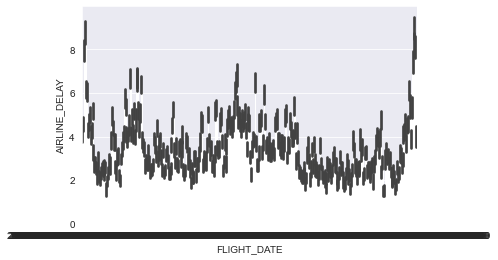

In [42]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(x ='FLIGHT_DATE', y ='AIRLINE_DELAY', data = flights, palette ='plasma')

***

As one could guess, airline delays are at their highest during the winter months. Though, what I find interesting from this chart is that there are large upticks in delays in the middle of the year during the summer months. It could be a result of extremely high temperatures.  

***

<AxesSubplot:xlabel='AIRLINE', ylabel='DISTANCE'>

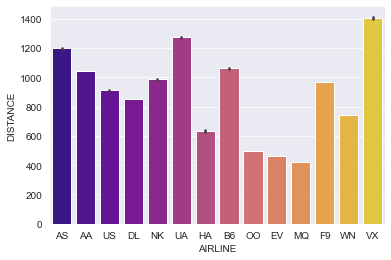

In [70]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(x ='AIRLINE', y ='DISTANCE', data = flights, palette ='plasma')

***

This matches what we inferred earlier. VX has both the longest and lengthiest flights. 

***

<AxesSubplot:xlabel='AIRLINE', ylabel='AIRLINE_DELAY'>

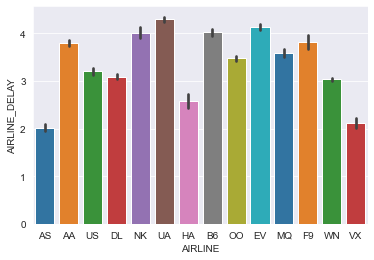

In [18]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(x ='AIRLINE', y ='AIRLINE_DELAY', data = flights, palette ='tab10')

***

Interestingly, VX does not lead the delays per airline. Surprisingly, MQ has the shortest routes and airtimes yet is among the leaders in delays amongst airlines. 

***

# 4. Model Development

In [16]:
col = ['DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLIGHT_DATE',
       'TOTAL_TAXI_TIME']

loc_df = flights.loc[ : , col]

In [17]:
#Run one model: it can be regression or classification, up to you! If you do both, you'll impress us. For the model,
#outputting the coefficients alone is sufficient, but think about what else you can do 
#    (hint: performance metrics? R-squared and RMSE, e.g.). You can do a train/test split, but it's not required

x = loc_df.drop(axis=1, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE', 'FLIGHT_NUMBER', 'CANCELLATION_REASON', 'DEPARTURE_DELAY', 'TAIL_NUMBER', 'FLIGHT_DATE', 'DEPARTURE_DELAY', 'AIRLINE_DELAY'])
y = loc_df['AIRLINE_DELAY']

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state=42)

print("X train = ", X_train.shape)
print("y train = ", y_train.shape)
print("\nX test = ", X_test.shape)
print("y test = ", y_test.shape)

X train =  (838860, 21)
y train =  (838860,)

X test =  (209715, 21)
y test =  (209715,)


In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Calculate the r-squared metric for the regression
score = lr_model.score(X_test, y_test)

# Print output
print('\nR-square = ', f'{score:.3f}')
print('Feature coefficients (aka slopes): \n')
for feature, coef in zip(X_train.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}')


R-square =  0.884
Feature coefficients (aka slopes): 

DAY_OF_WEEK : 0.06
SCHEDULED_DEPARTURE : 0.00
DEPARTURE_TIME : -0.00
TAXI_OUT : -0.04
WHEELS_OFF : -0.00
SCHEDULED_TIME : 0.21
ELAPSED_TIME : -0.17
AIR_TIME : 0.04
DISTANCE : -0.01
WHEELS_ON : -0.00
TAXI_IN : -0.02
SCHEDULED_ARRIVAL : 0.00
ARRIVAL_TIME : -0.00
ARRIVAL_DELAY : 0.85
DIVERTED : -28.59
CANCELLED : -28.07
AIR_SYSTEM_DELAY : -0.79
SECURITY_DELAY : -0.93
LATE_AIRCRAFT_DELAY : -0.88
WEATHER_DELAY : -0.85
TOTAL_TAXI_TIME : -0.06


***

We can see that there's massive overfitting since the R-square value is nearly 1. I would have anticipated it being closer to .6 or .7 normally. I assess this to be an issue with either the large number of columns/coefficients causing the model to overfit itself or some of the variables may be overcontributing to the model causing an overfit (i.e., TOTAL_TAXI_TIME is already added to the regression in the columns TAXI_IN and TAX_OUT, maybe it's contributing to an overfit.)

***

In [20]:
y_predicted = lr_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE = ", f'{rmse:.2f}')

RMSE =  8.05


***

We can see the RMSE also is very low, which means the model is fitting nearly perfectly with the data. This matches what we saw above. 

***

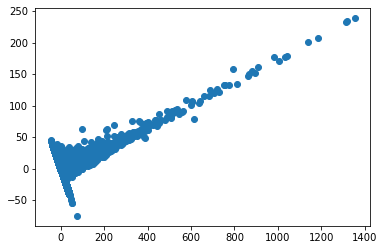

In [21]:
residuals = y_test - y_predicted 

plt.scatter(y_predicted,residuals)

plt.show()

#Used this site as a reference https://stackoverflow.com/questions/55095437/in-sklearn-regression-is-there-a-command-to-return-residuals-for-all-records

***

The residuals are completely off from one another. Even though the R-squared values are high and the RMSE is low, the residuals paint the picture of what we intuitively know about the model. While R-squared and RMSE both indicate an amazing model, the residuals show us the large difference between our predicted values versus our actual data. 

***

***

For this next model (logistic regression), let's only limit it to a few columns and see if that improves it. Let's also look at our correlation matrices and see what columns have the highest correlation on AIRLINE_DELAY. We will only use those columns for the next regression, which should hopefully give us a better result. 

***

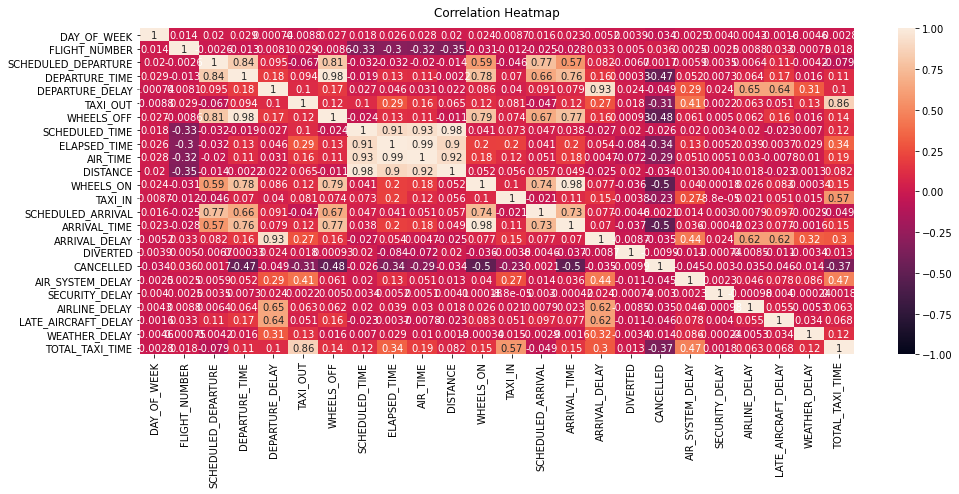

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(flights.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

***
We can see from the correlation heat map, many of the columns do not correlate with one another very much. The DELAY columns seem to be the only ones that consistently have a positive correlation. Let's take a deeper look into the AIRLINE_DELAY correlations. Also, in reference to a previous question on taxi time vs day of the week or flight_date, there appears to be no correlation. 
***

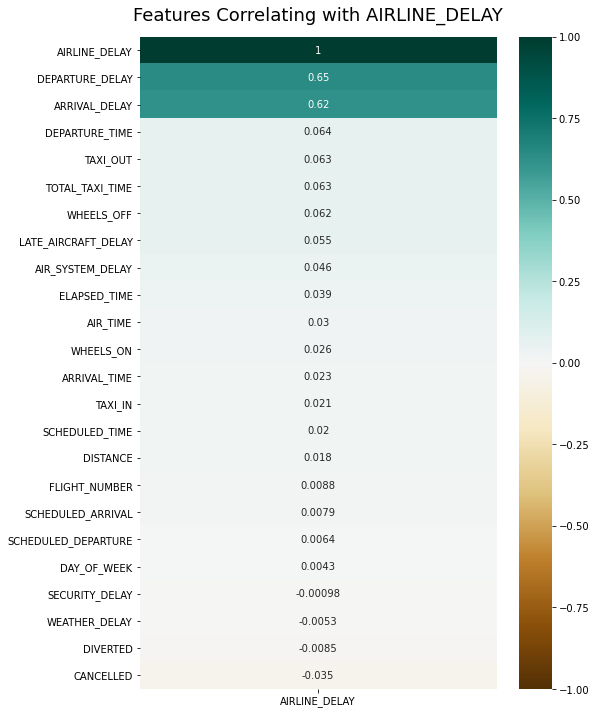

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(flights.corr()[['AIRLINE_DELAY']].sort_values(by='AIRLINE_DELAY', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with AIRLINE_DELAY', fontdict={'fontsize':18}, pad=16);

***

I'm going to use the top 5 columns from the previous chart, excluding AIRLINE_DELAY, to build the logistic model. Isolating these columns from the rest should cause a potentially better result than what we saw earlier. 

***

In [17]:
col = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DEPARTURE_TIME', 
       'TOTAL_TAXI_TIME']

loc_df = flights.loc[ : , col]

X_train, X_test, y_train, y_test = train_test_split(loc_df.iloc[:, 1:], loc_df.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)


In [25]:
loc_df.head()

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,DEPARTURE_TIME,TOTAL_TAXI_TIME
0,-11.0,-22.0,0.0,0.0,2354.0,25.0
1,-8.0,-9.0,0.0,0.0,2.0,16.0
2,-2.0,5.0,0.0,0.0,18.0,27.0
3,-5.0,-9.0,0.0,0.0,15.0,23.0
4,-1.0,-21.0,0.0,0.0,24.0,16.0


In [19]:
log_reg = LogisticRegression(solver= 'liblinear', C=1000, n_jobs=10)
log_reg.fit(X_train[['AIRLINE_DELAY']], y_train)

/Users/douglasmacintosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(C=1000, n_jobs=10, solver='liblinear')

In [20]:
log_reg.score(X_train[['AIRLINE_DELAY']], y_train) #accuracy 

0.0917852800228882

***

For a model based on variables choice through intuition and not through a normal variable selection like a Boruta function, this score is what would be expected. For further iterations and improvements of the model, we can look at the other columns and see which contributes to a better model. 

***

In [26]:
input_delays = X_train[['AIRLINE_DELAY']].values
input_delays[0:10]

array([[ 0.],
       [26.],
       [18.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [18.],
       [ 0.]])

In [25]:
class_prediction = log_reg.predict(input_delays)
class_prediction[0:10]

array([ 0., 15., 12.,  0.,  0.,  0.,  0.,  0., 12.,  0.])

In [27]:
confusion_matrix(y_train, class_prediction)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

****
We can see from the inputs and the confusion matrix itself, our logistics regression is as inaccurate as our accuracy score predicts. There is a very large amount of misclassification as currently constructed. 
****

# 5. Conclusion

****

This dataset was an interesting exercise in exploring a rather large dataset. After initially exploring the data, I found many of my assertions about the data to be true. We learned that long-distance flights were more likely to be delayed (though not always), and winter month flights get canceled and delayed more. All of which we could've expected, but interestingly, we found that it was independent of the airline. Model development was less effective in predicting airline delays, but as we discussed, the large dataset posed some problems, and better feature selection for the model would contribute to a better result. Overall, this exercise allowed us to reaffirm some hypotheses we had as well as glean new information that we may or may have expected. 


***